<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Pandas (Good)</span></div>

## 1 Missing data

In [25]:
import pandas as pd
import numpy as np
df_class = pd.read_excel("finalised_scores.xlsx", skiprows = 0)
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MATRIC_NO  35 non-null     object 
 1   Name       35 non-null     object 
 2   Major      35 non-null     object 
 3   Gender     35 non-null     object 
 4   Test 1     33 non-null     float64
 5   Test 2     32 non-null     float64
 6   Total      31 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.0+ KB


### 1.1 All missing data

In [26]:
df_class.isna()

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Total
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


### 1.2 Columns and rows of the missing data

In [27]:
df_class.isna().any(axis=0)      # Are there any True in the columns?

MATRIC_NO    False
Name         False
Major        False
Gender       False
Test 1        True
Test 2        True
Total         True
dtype: bool

In [28]:
df_class.isna().any(axis=1)      # Are there any True in the rows?

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

### 1.3 More details of the missing numbers

In [29]:
mask_for_nan = df_class.isna().any(axis=1)
df_class[mask_for_nan]

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Total
4,A5410124H,Kyla Young,Physics,Male,15.306,NaN,NaN
14,A7653832E,Quentin Kemp,Chemistry,Female,NaN,15.72,NaN
20,A2727061A,Malik Becker,Physics,Male,12.858,NaN,NaN
28,A3699958T,Norah Miles,Chemistry,Male,NaN,NaN,NaN


### 1.4 Dealing with missing numbers?

In [30]:
df_class.fillna(1e5, inplace=True)
df_class[mask_for_nan]

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Total
4,A5410124H,Kyla Young,Physics,Male,15.306,100000.00,100000.0
14,A7653832E,Quentin Kemp,Chemistry,Female,100000.000,15.72,100000.0
20,A2727061A,Malik Becker,Physics,Male,12.858,100000.00,100000.0
28,A3699958T,Norah Miles,Chemistry,Male,100000.000,100000.00,100000.0


In [ ]:
# expunge columns
mask_for_nan_columns = df_class.isna().any(axis=0)
columns_to_keep = df_class.columns[~mask_for_nan_columns].values
df_class = df_class[columns_to_keep]

df_class.dropna(axis = 0, inplace=True)
# expunge rows
df_class = df_class[~mask_for_nan]
df_class.dropna(axis = 1, inplace=True)

# replace with average
test_mean = df_class.loc['Test 1'].mean()
df.loc['Test 1'].fillna(test_mean)

### 1.5 Itterating over a dataframe
I was looking for a way to introduce iterating (looping) over a dataframe. Now is an excellent opportunity because we can use it to replace the missing data. But this is certainly not the best way because there are highly optimised weapons in the Panda’s arsenal like `apply()`, `fillna()` and so on. However, I (lazily) often find myself using loops because they are plain and simple to get started and understand.

You can loop through your dataframe using the method `itterrows()` as follows. It spits out the index and the row for every iteration.

In [31]:
df_class = pd.read_excel("finalised_scores.xlsx", skiprows = 0)

for index, row in df_class.iterrows():
    name = row['Name']

    for column in ['Test 1', 'Test 2']:
        if np.isnan(row[column]):
            print(f'{index}: {name:<15}  missing data for {column}')
            df_class.loc[index, column] = 0

4: Kyla Young       missing data for Test 2
14: Quentin Kemp     missing data for Test 1
20: Malik Becker     missing data for Test 2
28: Norah Miles      missing data for Test 1
28: Norah Miles      missing data for Test 2


## 2 Combining dataframes

### 2.1 The complete recipe

In [32]:
df_class_2 = pd.read_excel('dummy-class-2-of-2.xlsx')

#------------------------- Rename columns ------------------------#
new_column_info = {'Student No': 'MATRIC_NO',
                   'Test 3 (50%)': 'Test 3'}

df_class_2.rename(columns=new_column_info, inplace=True)

#--------------------- Set index to MATRIC_NO --------------------#
df_class_2.set_index('MATRIC_NO', inplace=True)

df_class_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, A3028967J to A4080490P
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Test 3  31 non-null     float64
dtypes: float64(1)
memory usage: 496.0+ bytes


In [33]:
#concatenate along axis=1 so that the dataframes are joined along the columns
df_combined = pd.concat([df_class, df_class_2], axis=1)
# something is probably wrong here...

In [34]:
#-----------------------------------------------------------------#
#                           First file                            #
#-----------------------------------------------------------------#
df_class_1 = pd.read_excel('dummy-class-1-of-2.xlsx', skiprows=1)

columns_to_keep = ['Student No', 'Name', 'Major', 'Gender',
                   'Test 1 (30%)', 'Test 2 (20%)']
df_class_1 = df_class_1[columns_to_keep]

new_column_info = {'Student No': 'MATRIC_NO',
                   'Test 1 (30%)': 'Test 1',
                   'Test 2 (20%)': 'Test 2'}
df_class_1.rename(columns=new_column_info, inplace=True)

df_class_1.set_index('MATRIC_NO', drop=False, inplace=True)

replace_info = {
    'PHY': 'Physics',
    'CHM': 'Chemistry',
    'LS': 'Life Sciences',
    'CBIO': 'Comp. Biology',
    'F': 'Female',
    'M': 'Male',
    'NB': 'Non-binary'
}
df_class_1.replace(to_replace=replace_info, inplace=True)

def clean(text):
    '''
    Function to remove ' ' from column 'Test 2'.
    To be applied using apply()
    '''
    try:
        return text.replace("'", "")
    except AttributeError:
        # This will handle the NaN of the missing data
        return text

df_class_1['Test 2'] = df_class_1['Test 2'].apply(clean)

#-----------------------------------------------------------------#
#                           Second file                           #
#-----------------------------------------------------------------#
df_class_2 = pd.read_excel('dummy-class-2-of-2.xlsx')

new_column_info = {'Student No': 'MATRIC_NO',
                   'Test 3 (50%)': 'Test 3'}
df_class_2.rename(columns=new_column_info, inplace=True)

df_class_2.set_index('MATRIC_NO', inplace=True)

#---------- Concatenate the two dataframes along columns ---------#
df_combined = pd.concat([df_class_1, df_class_2], axis=1)

#-----------------------------------------------------------------#

df_combined.fillna(0, inplace=True)

# move the astype here
new_type_info = {'Major': 'category',
                 'Gender': 'category',
                 'Test 2': 'float'}
df_combined = df_combined.astype(new_type_info)
df_combined["Total"] = df_combined[["Test 1", "Test 2", "Test 3"]].sum(axis=1)
df_combined.sort_values(by='Total', inplace=True)
df_combined = df_combined.round(2)
df_combined.to_excel('finalised_scores.xlsx', index=False)
df_combined.head()

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Test 3,Total
MATRIC_NO,,,,,,,,
A3699958T,A3699958T,Norah Miles,Chemistry,Male,0.00,0.00,0.0,0.00
A6867791C,A6867791C,Katie Ayers,Comp. Biology,Female,16.53,10.28,0.0,26.81
A5410124H,A5410124H,Kyla Young,Physics,Male,15.31,0.00,17.5,32.81
A7210476B,A7210476B,Sidney Wiggins,Physics,Non-binary,19.59,14.68,0.0,34.27
A7667457P,A7667457P,Carter Crane,Life Sciences,Male,20.82,13.82,0.0,34.63


## 3 Plotting directly from Pandas

### 3.1 Barcharts

C:\Users\yimqi\AppData\Local\Temp/ipykernel_34788/2416011665.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")


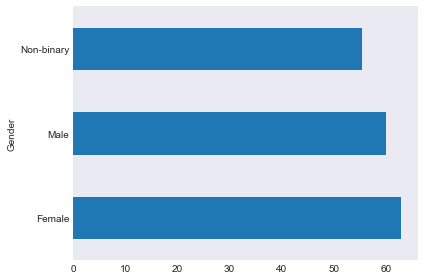

In [35]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

grp = df_combined.groupby(['Gender'])["Total"]
grp.mean().plot(kind='barh');
plt.tight_layout()
plt.show()

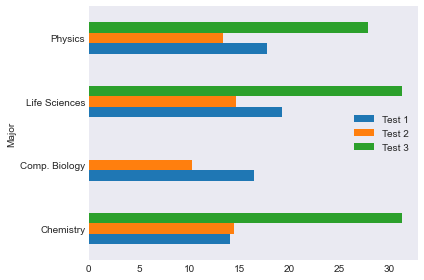

In [36]:
grp = df_combined.groupby(['Major'])[["Test 1", "Test 2", "Test 3"]]
grp.mean().plot(kind='barh')
plt.tight_layout()
plt.show()

### 3.2 Histograms

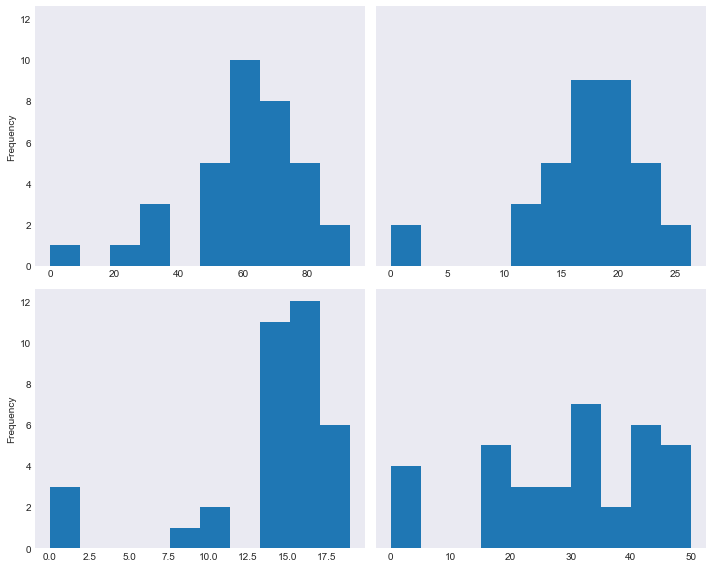

In [37]:
fix, ax = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(10,8))
df_combined['Total'].plot.hist(ax=ax[0, 0])
df_combined['Test 1'].plot.hist(ax=ax[0, 1])
df_combined['Test 2'].plot.hist(ax=ax[1, 0])
df_combined['Test 3'].plot.hist(ax=ax[1, 1])
plt.tight_layout()
plt.show()

### 3.3 Pie

<Axes: >

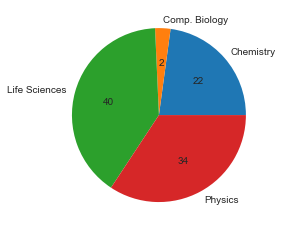

In [38]:
df_combined.groupby('Major').size().plot.pie(autopct="%d")

### 3.4 Boxplots

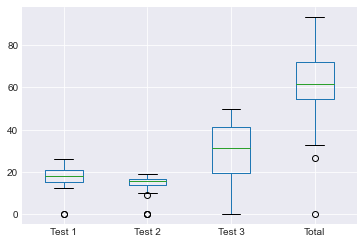

In [39]:
df_combined.boxplot()
plt.show()

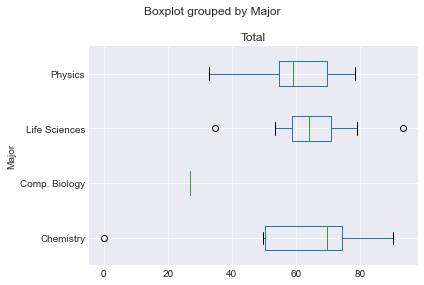

In [40]:
df_combined.boxplot(by='Major', column=['Total'], vert=False);
plt.tight_layout()
plt.show()

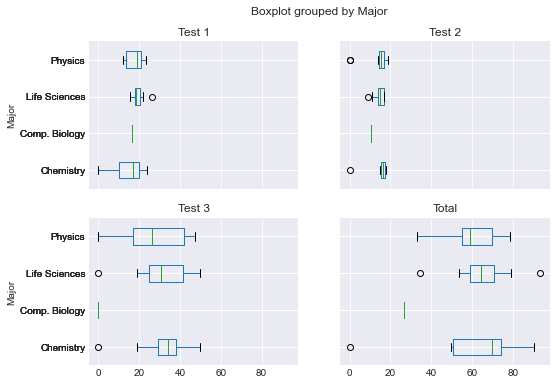

In [41]:
df_combined.boxplot(by='Major',
                    column=['Test 1', 'Test 2', 'Test 3', 'Total'],
                    vert=False, figsize=(8, 6));
plt.show()

## Exercise 1 :  Oh no! Yet another class!

I have done this with Excel's `VLOOKUP()` before and it is not fun. I think you get the point.

In [85]:
df_test1 = pd.read_excel('class_test-01.xlsx')
df_test2 = pd.read_excel('class_test-02.xlsx')
df_stud = pd.read_excel('class_names.xlsx')
df_stud.info(),df_test1.info(),df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Student No  10 non-null     object
 1   Name        10 non-null     object
 2   Gender      10 non-null     object
 3   Email       10 non-null     object
 4   Major       10 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student No  9 non-null      object 
 1   Score       9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 272.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student No  7 non-null      object 
 1   Score       7 non-null   

(None, None, None)

In [86]:
df_stud.set_index('Student No', inplace=True)
df_test1.set_index('Student No', inplace=True)
df_test2.set_index('Student No', inplace=True)
replace_info = {
    'PHY': 'Physics',
    'CHM': 'Chemistry',
    'LS': 'Life Sciences',
    'CBIO': 'Comp. Biology',
    'F': 'Female',
    'M': 'Male',
    'NB': 'Non-binary'
}
df_test1.rename(columns={'Score': 'Test 1'}, inplace=True)  # just doing it inline
df_test2.rename(columns={'Score': 'Test 2'}, inplace=True)
df_stud.replace(to_replace=replace_info, inplace=True)
df_combined = pd.concat([df_stud,df_test1, df_test2], axis=1)

In [100]:
df_combined.fillna(0, inplace=True)
df_combined['final score'] = df_combined['Test 1']*35/25 + df_combined['Test 2']*65/35
df_combined = df_combined.round(2)
df_combined.to_excel('class_final-scores.xlsx', index=False)


In [101]:
df_combined

,Name,Gender,Email,Major,Test 1,Test 2,final score
Student No,,,,,,,
A80082135P,Delmer Ferland,Male,delmer.ferland_2015@nus.edu.sg,Physics,16.98,19.83,60.60
A75939995U,Jonell Teske,Female,jonell.teske_2016@nus.edu.sg,Physics,15.92,0.00,22.29
A97067760C,Cathern Kerwin,Female,cathern.kerwin_2015@nus.edu.sg,Life Science,15.16,0.00,21.22
A31152769E,Tandra Kunz,Female,tandra.kunz_2017@nus.edu.sg,Chemistry,17.22,15.72,53.30
A23853411O,Bryanna Ash,Female,bryanna.ash_2017@nus.edu.sg,Chemistry,17.73,19.37,60.79
A51101573L,Helena Crandell,Female,helena.crandell_2016@nus.edu.sg,Physics,0.00,0.00,0.00
A39424921D,Douglas Punc,Male,douglas.punc_2013@nus.edu.sg,Physics,16.46,21.96,63.83
A28951274W,Anderson Maxie,Male,anderson.maxie_2015@nus.edu.sg,Life Science,15.75,19.20,57.71
A04222051I,Sidney Warthen,Male,sidney.warthen_2013@nus.edu.sg,Life Science,15.37,19.23,57.23
